<a href="https://colab.research.google.com/github/najouaelfethi/bigdataproject/blob/main/EDA_Pr%C3%A9traitement%26Mod%C3%A9lisation_Pr%C3%A9dective_Consommation_%C3%A9nergitique.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Prédire la consommation énergitique future (Analyse en séries temporelles)

## EDA (Exploratory Data Analysis)
**Objectif :** se mettre à l’aise avec le dataset et comprendre au maximum nos différentes variables pour ensuite définir une stratégie de modélisation. Qu’est-ce qu’on va faire avec nos données pour atteindre notre objectif ?
Checklist de base (Non-exhaustive) :

**Analyse de la forme :**
- **Identification de la Target :**
    - AEP_MW (consommation de l'énergie électrique en MégaWT)
- **Nombre de lignes et de colonnes :**(121273 Lignes, 2 Colonnes)
- **Types de variables :**
    - 1 Quantitative / Continue(AEP_MW)
    - 1 Qualitative / Variable temporelle (Datetime)
- **Analyse des valeurs manquantes :**
    - 0 valeurs manquantes trouvé.

**Analyse du fond :**
- **Visualisation de la Target :**
    - En déchiffrant la variable AWP_MW pour différent référence temporelle, nous obtenons qu'il y a certain année notamment **2004** et **2018** qui ne possèdent pas de valeurs de consommation pour certain mois.
    - Après une étude approfondie, nous avons conclu que ce sont les successivement les années de début et de fin de l'opération de collection des données de consommation énergitique.
- **Compréhension des différentes variables (Internet) :**
    - **Saisonalité -**
    - pendant les mois d'Hiver la consommation atteint ses pics notamment les mois 12-1-2, cela peut etre expliqué par le fait d'utilisation des chauffages. Ainsi que pendant l'été pour les climatiseurs.
    - En printemps et en automne, généralement ce sont des saisons stable en consommation, les moyennes de consommation sont plus faibles 3-4-5

    - **Mensualité -**
    - Apparemment que l'année 2007 préconise le pic de consommation, cela peut etre signifié par une crise énergitique mais cela reste qu'une hypothèse (à vérifier plus tard).
    - 2008 aussi reste importante en terme de consommation par rapport au autres distributions.
    - **Données Anuelle -**
    - la consommation depuis 2005 jusqu'à 2010 atteint ces pics, cepandant après 2010 la consommation continue à diminuer d'une façon plus vite.
    - Cela probablement est du à l'exploration de nouveaux sources d'enérgies remplacante, tels que les énergies renouvelables (solaire, éoliène, etc) ainsi que l'adoption de technologies plus économes en énergie dans les secteurs résidentiel, industriel et commercial.
    - **Données journalières -** ils sont apperement continues et ne contiennent pas de doublons.


- **Visualisation des relations Features – Target (Histogrammes/Boxplot) :**

- **Identification des outliers :**
    - Valeurs aberrantes détectées :  11



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import to_timestamp, year, month, avg, sum, to_date,col

In [ ]:
spark = SparkSession.builder.appName("EnergyConsumptionApp").getOrCreate()

In [ ]:
df = spark.read.csv("/content/drive/MyDrive/Datasets/AEP_hourly.csv", header=True, inferSchema=True)

In [ ]:
df.show()

+-------------------+-------+
|           Datetime| AEP_MW|
+-------------------+-------+
|2004-12-31 01:00:00|13478.0|
|2004-12-31 02:00:00|12865.0|
|2004-12-31 03:00:00|12577.0|
|2004-12-31 04:00:00|12517.0|
|2004-12-31 05:00:00|12670.0|
|2004-12-31 06:00:00|13038.0|
|2004-12-31 07:00:00|13692.0|
|2004-12-31 08:00:00|14297.0|
|2004-12-31 09:00:00|14719.0|
|2004-12-31 10:00:00|14941.0|
|2004-12-31 11:00:00|15184.0|
|2004-12-31 12:00:00|15009.0|
|2004-12-31 13:00:00|14808.0|
|2004-12-31 14:00:00|14522.0|
|2004-12-31 15:00:00|14349.0|
|2004-12-31 16:00:00|14107.0|
|2004-12-31 17:00:00|14410.0|
|2004-12-31 18:00:00|15174.0|
|2004-12-31 19:00:00|15261.0|
|2004-12-31 20:00:00|14774.0|
+-------------------+-------+
only showing top 20 rows



In [ ]:
print(f"Nombre de lignes: ",df.count(), "\nNombre de colonnes: ",len(df.columns))

Nombre de lignes:  121273 
Nombre de colonnes:  2


In [ ]:
df = df.withColumn("Datetime", to_timestamp(df["Datetime"]))
print(f"Type des variables: ",df.dtypes)

Type des variables:  [('Datetime', 'timestamp'), ('AEP_MW', 'double')]


In [ ]:
df_pd = df.toPandas()

# Visualisation des valeurs manquantes(NaN)

<Axes: >

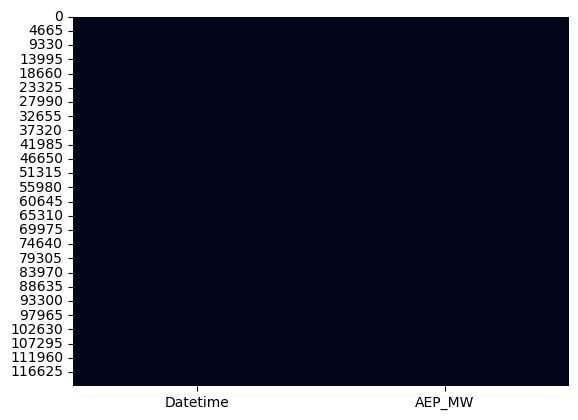

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(df_pd.isna(), cbar=False)

# Distribution des données de consommation

<ipython-input-11-ca9938b5be56>:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_pd['AEP_MW'],shade=True, color="blue")


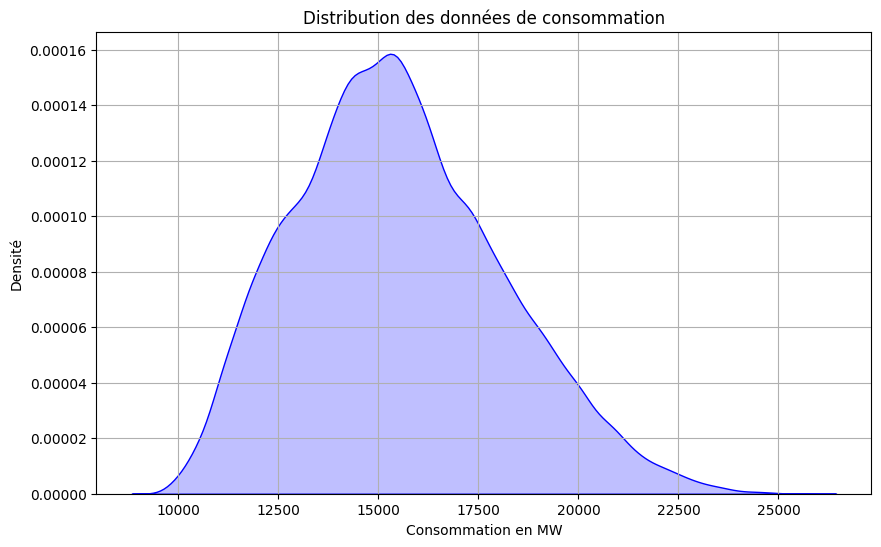

In [ ]:
plt.figure(figsize=(10,6))
sns.kdeplot(df_pd['AEP_MW'],shade=True, color="blue")
plt.title('Distribution des données de consommation')
plt.xlabel('Consommation en MW')
plt.ylabel('Densité')
plt.grid()
plt.show()

#Extraction des variables Year & Month


In [ ]:
df = df.withColumn("Year", year(df["Datetime"]))
df = df.withColumn("Month", month(df["Datetime"]))

In [ ]:
df.show()

+-------------------+-------+----+-----+
|           Datetime| AEP_MW|Year|Month|
+-------------------+-------+----+-----+
|2004-12-31 01:00:00|13478.0|2004|   12|
|2004-12-31 02:00:00|12865.0|2004|   12|
|2004-12-31 03:00:00|12577.0|2004|   12|
|2004-12-31 04:00:00|12517.0|2004|   12|
|2004-12-31 05:00:00|12670.0|2004|   12|
|2004-12-31 06:00:00|13038.0|2004|   12|
|2004-12-31 07:00:00|13692.0|2004|   12|
|2004-12-31 08:00:00|14297.0|2004|   12|
|2004-12-31 09:00:00|14719.0|2004|   12|
|2004-12-31 10:00:00|14941.0|2004|   12|
|2004-12-31 11:00:00|15184.0|2004|   12|
|2004-12-31 12:00:00|15009.0|2004|   12|
|2004-12-31 13:00:00|14808.0|2004|   12|
|2004-12-31 14:00:00|14522.0|2004|   12|
|2004-12-31 15:00:00|14349.0|2004|   12|
|2004-12-31 16:00:00|14107.0|2004|   12|
|2004-12-31 17:00:00|14410.0|2004|   12|
|2004-12-31 18:00:00|15174.0|2004|   12|
|2004-12-31 19:00:00|15261.0|2004|   12|
|2004-12-31 20:00:00|14774.0|2004|   12|
+-------------------+-------+----+-----+
only showing top

# Visulaisation de la consommation moyenne par année

In [ ]:
# Calculer la consommation moyenne par année
annual_avg_consumption = df.groupBy("Year").agg(avg("AEP_MW").alias("average_consumption"))

# Transformation en Pandas dataframe
pd_annual_avg_consumption = annual_avg_consumption.toPandas()

# Sauvegarde des résultats
pd_annual_avg_consumption.to_excel("/content/drive/MyDrive/Datasets/result_data/AVG_annee.xlsx",index=False)

# Afficher les résultats
annual_avg_consumption.show()

+----+-------------------+
|Year|average_consumption|
+----+-------------------+
|2007|  16645.51929664307|
|2018| 15290.612733644859|
|2015| 14868.922602739725|
|2006| 15737.224252112355|
|2013| 15198.211577985841|
|2014|  15169.07889028428|
|2004| 15176.724388032639|
|2012|  15352.94066734996|
|2009| 15254.111669330898|
|2016| 14784.225979052824|
|2005| 15842.990865494405|
|2010| 16008.619504396484|
|2011| 15815.389472482302|
|2008|  16536.65565930312|
|2017| 14483.738356164384|
+----+-------------------+



In [ ]:
# Filtrage des années en ordre
pd_annual_avg_consumption = pd_annual_avg_consumption.sort_values('Year')

# Affichage du dataframe
pd_annual_avg_consumption

,Year,average_consumption
6,2004,15176.724388
10,2005,15842.990865
3,2006,15737.224252
0,2007,16645.519297
13,2008,16536.655659
8,2009,15254.111669
11,2010,16008.619504
12,2011,15815.389472
7,2012,15352.940667
4,2013,15198.211578


#Visualisation de la consommation annuelle


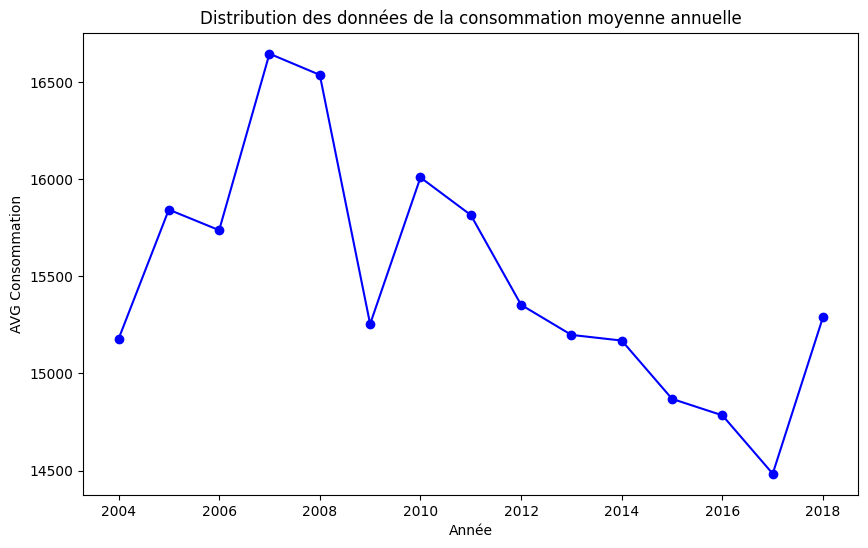

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(pd_annual_avg_consumption['Year'],pd_annual_avg_consumption['average_consumption'], marker='o', color="blue")
plt.title('Distribution des données de la consommation moyenne annuelle')
plt.xlabel('Année')
plt.ylabel('AVG Consommation')
plt.show()

- la consommation depuis 2005 jusqu'à 2010 atteint ces pics, cepandant après 2010 la consommation continue à diminuer d'une façon plus vite.
- Cela probablement est du à l'exploration de nouveaux sources d'enérgies remplacante, tels que les énergies renouvelables (solaire, éoliène, etc) ainsi que l'adoption de technologies plus économes en énergie dans les secteurs résidentiel, industriel et commercial.

# Visualisation de la consommation mensuelle pour chaque année

In [ ]:
# Agréger les données par année et mois
df_monthly_consumption = df.groupBy("Year", "Month") \
    .agg(
        sum("AEP_MW").alias("total_consumption"),  # Somme de la consommation
        avg("AEP_MW").alias("avg_consumption")  # Moyenne de la consommation
    ) \
    .orderBy("Year","Month")  # Trier par année et mois

# Afficher le résultat
df_monthly_consumption.show()


+----+-----+-----------------+------------------+
|Year|Month|total_consumption|   avg_consumption|
+----+-----+-----------------+------------------+
|2004|   10|      1.0349073E7|13947.537735849057|
|2004|   11|      1.0677917E7|14830.440277777778|
|2004|   12|      1.2452864E7|16737.720430107525|
|2005|    1|      1.2735114E7| 17117.08870967742|
|2005|    2|      1.1085745E7|16496.644345238095|
|2005|    3|      1.1847502E7| 15924.06182795699|
|2005|    4|      1.0089312E7| 14032.42280945758|
|2005|    5|      1.0181694E7|13685.072580645161|
|2005|    6|       1.170024E7|16250.333333333334|
|2005|    7|      1.2546722E7| 16863.87365591398|
|2005|    8|      1.2834811E7| 17251.09005376344|
|2005|    9|      1.1049942E7|15347.141666666666|
|2005|   10|      1.0685367E7|14381.382234185734|
|2005|   11|      1.0940315E7|15194.881944444445|
|2005|   12|       1.305615E7| 17548.58870967742|
|2006|    1|      1.2208918E7|16409.836021505376|
|2006|    2|      1.1569171E7|17216.028273809523|


# Années incomplètes au niveau des mois

In [ ]:
df_monthly_consumption.filter(df_monthly_consumption['Year']==2004).show()

+----+-----+-----------------+------------------+
|Year|Month|total_consumption|   avg_consumption|
+----+-----+-----------------+------------------+
|2004|   10|      1.0349073E7|13947.537735849057|
|2004|   11|      1.0677917E7|14830.440277777778|
|2004|   12|      1.2452864E7|16737.720430107525|
+----+-----+-----------------+------------------+



In [ ]:
df_monthly_consumption.filter(df_monthly_consumption['Year']==2018).show()

+----+-----+-----------------+------------------+
|Year|Month|total_consumption|   avg_consumption|
+----+-----+-----------------+------------------+
|2018|    1|      1.3090587E7|         17594.875|
|2018|    2|      1.0265918E7| 15276.66369047619|
|2018|    3|      1.1228646E7|15112.578734858682|
|2018|    4|        9820256.0|13639.244444444445|
|2018|    5|      1.0503052E7|14117.005376344086|
|2018|    6|       1.101978E7|          15305.25|
|2018|    7|      1.1849407E7|15926.622311827958|
|2018|    8|         754941.0|15406.959183673469|
+----+-----+-----------------+------------------+



- 2004 ne possède que trois mois 10,11,12

- 2018 ne possède que entre 1-8



# Décision immédiate
- On a décidé d'éliminer ces deux année (2004 & 2018) bien que cela concerne la phase prétraitement

In [ ]:
# Elimination des année non complètes en termes de mois
df = df.filter((df_monthly_consumption['Year']!=2004) & (df_monthly_consumption['Year']!=2018))

df_monthly_consumption = df_monthly_consumption.filter((df_monthly_consumption['Year']!=2004) & (df_monthly_consumption['Year']!=2018))

In [ ]:
# Transformation en Pandas dataframe
pd_monthly_consumption = df_monthly_consumption.orderBy("Year", "Month").toPandas()

# Sauvegarde des résultats
pd_monthly_consumption.to_excel("/content/drive/MyDrive/Datasets/result_data/Consommation_mensuelle_par_annee.xlsx",index=False)

In [ ]:
pd_monthly_consumption

,Year,Month,total_consumption,avg_consumption
0,2005,1,12735114.0,17117.088710
1,2005,2,11085745.0,16496.644345
2,2005,3,11847502.0,15924.061828
3,2005,4,10089312.0,14032.422809
4,2005,5,10181694.0,13685.072581
...,...,...,...,...
151,2017,8,11190134.0,15040.502688
152,2017,9,9945277.0,13812.884722
153,2017,10,9921554.0,13335.422043
154,2017,11,10305415.0,14293.224688


# Visualisation de la consommation mensuelle pour chaque année du Dataset

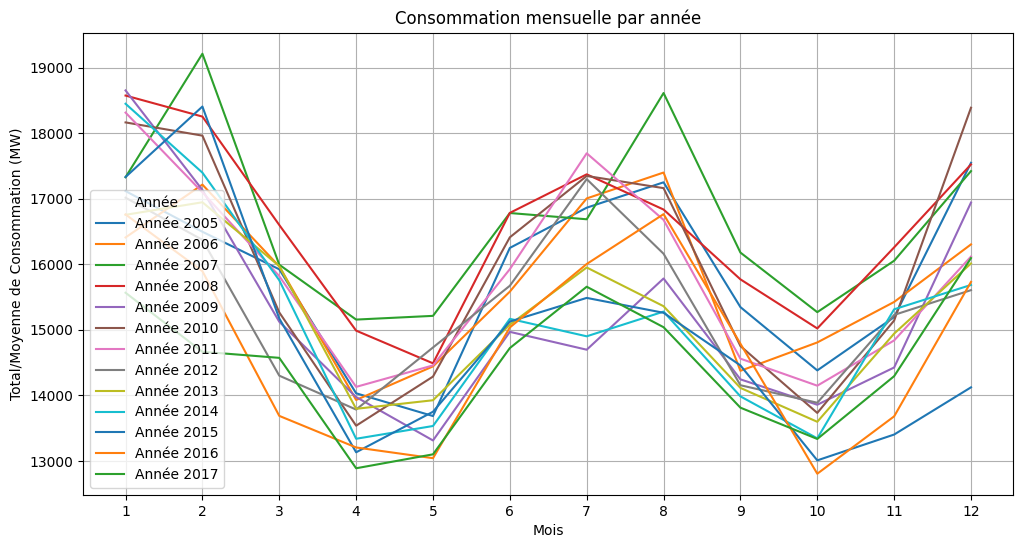

In [ ]:
# Préparer les données pour le tracé
years = pd_monthly_consumption['Year'].unique()  # Liste des années disponibles

plt.figure(figsize=(12, 6))

# Boucle pour tracer une courbe par année
for year in years:
    # Filtrer les données pour une année donnée
    data_year = pd_monthly_consumption[pd_monthly_consumption['Year'] == year]
    # Tracer les données pour cette année
    plt.plot(
        data_year['Month'],
        data_year['avg_consumption'],  # Remplacez par 'avg_consumption' si nécessaire
        #marker='o',
        label=f"Année {year}"
    )

# Ajouter des labels et une légende
plt.title('Consommation mensuelle par année')
plt.xlabel('Mois')
plt.ylabel('Total/Moyenne de Consommation (MW)')
plt.xticks(range(1, 13))  # Afficher les mois de 1 à 12
plt.legend(title="Année")
plt.grid(True)
plt.show()


##Résultat & explications
- Apparemment que l'année 2007 préconise le pic de consommation, cela peut etre signifié par une crise énergitique mais cela reste qu'une hypothèse (à vérifier plus tard).
- 2008 aussi reste importante en terme de consommation par rapport au autres distributions.

# Visualisation de la consommation globale par saisons (Hiver, Printemps, été, Automne)

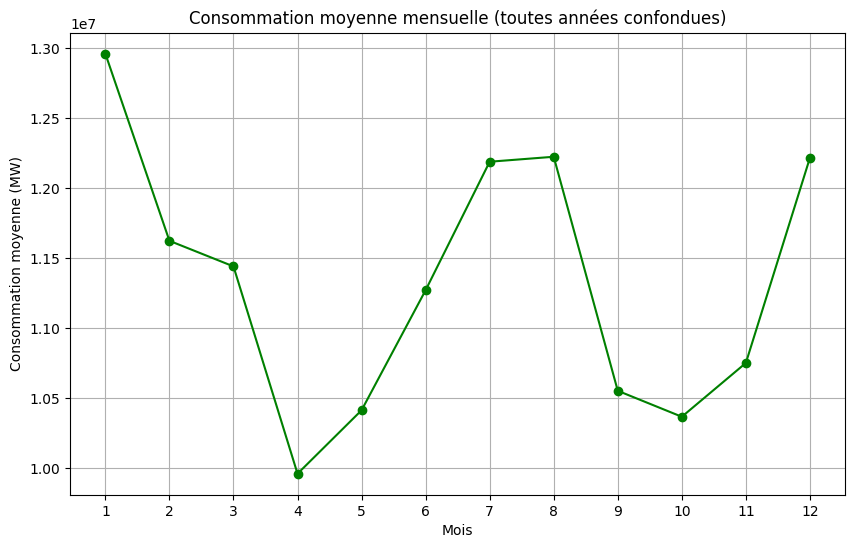

In [ ]:
df_monthly_avg = df_monthly_consumption.groupBy("Month") \
    .agg(avg("total_consumption").alias("avg_monthly_consumption")) \
    .orderBy("Month").toPandas()

plt.figure(figsize=(10, 6))
plt.plot(df_monthly_avg['Month'], df_monthly_avg['avg_monthly_consumption'], marker='o', color='green')
plt.title('Consommation moyenne mensuelle (toutes années confondues)')
plt.xlabel('Mois')
plt.ylabel('Consommation moyenne (MW)')
plt.xticks(range(1, 13))
plt.grid(True)
plt.show()


- pendant les mois d'Hiver la consommation atteint ses pics notamment les mois 12-1-2, cela peut etre expliqué par le fait d'utilisation des chauffages. Ainsi que pendant l'été pour les climatiseurs.

- En printemps et en automne, généralement ce sont des saisons stable en consommation, les moyennes de consommation sont plus faibles 3-4-5

#Consommation hebdomadaire/heures de la journée

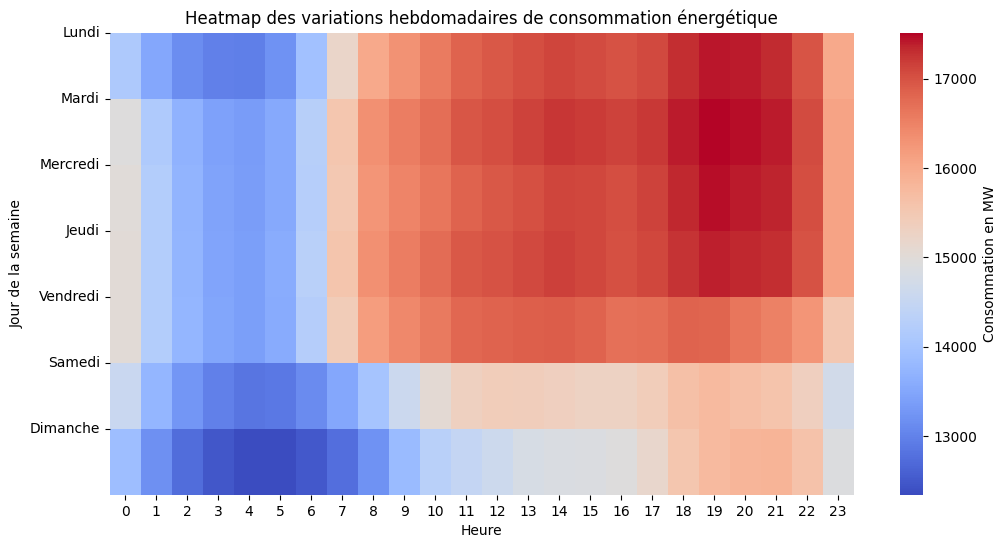

In [ ]:
df_hours_dayofweek = df_pd.copy()
df_hours_dayofweek['Datetime'] = pd.to_datetime(df_hours_dayofweek['Datetime'])

# Extraction des jours et des heures
df_hours_dayofweek['DayOfWeek'] = df_hours_dayofweek['Datetime'].dt.dayofweek  # Lundi = 0, Dimanche = 6
df_hours_dayofweek['Hour'] = df_hours_dayofweek['Datetime'].dt.hour

# Moyenne par jour de la semaine et heure
heatmap_data = df_hours_dayofweek.groupby(['DayOfWeek', 'Hour'])['AEP_MW'].mean().unstack()

# Création de la heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(heatmap_data, cmap='coolwarm', annot=False, fmt=".0f", cbar_kws={'label': 'Consommation en MW'})
plt.title("Heatmap des variations hebdomadaires de consommation énergétique")
plt.xlabel("Heure")
plt.ylabel("Jour de la semaine")
plt.yticks(range(7), ['Lundi', 'Mardi', 'Mercredi', 'Jeudi', 'Vendredi', 'Samedi', 'Dimanche'], rotation=0)
plt.show()


Résultats & Interprétation
- La consommation énergétique atteint son minimum entre 0h et 5h du matin, ce qui correspond aux heures de sommeil. Durant cette période, l’activité humaine est réduite (moins d’appareils électroménagers en marche, bureaux et industries fermés).
-  À partir de 6h-7h, la consommation commence à augmenter rapidement. Cela correspond à la reprise des activités humaines : réveil des ménages, mise en marche des appareils, début des activités professionnelles.
- La consommation atteint ses pics entre 18h et 21h, reflétant une activité domestique accrue (dîner, éclairage, divertissement, chauffage ou climatisation en soirée).


# Consommation journalière

In [ ]:
#df_without_04_18 = df.filter((df_monthly_consumption['Year']!=2004) & (df_monthly_consumption['Year']!=2018))

df_daily_consumption = df.withColumn("Date", to_date("Datetime"))

df_daily_sum = df_daily_consumption.groupBy("Date").agg(sum("AEP_MW").alias("Daily_Total_Consumption"))

pd_daily_sum = df_daily_sum.orderBy("Date").toPandas()


df_daily_sum.show()


+----------+-----------------------+
|      Date|Daily_Total_Consumption|
+----------+-----------------------+
|2005-06-06|               415076.0|
|2005-01-16|               400928.0|
|2006-05-21|               299369.0|
|2006-05-17|               350074.0|
|2007-11-23|               364940.0|
|2007-11-15|               405689.0|
|2007-04-20|               360528.0|
|2009-11-22|               336695.0|
|2009-07-25|               329883.0|
|2010-08-11|               463118.0|
|2012-10-06|               294810.0|
|2012-04-17|               336136.0|
|2013-09-09|               395840.0|
|2013-05-21|               392858.0|
|2013-03-26|               412198.0|
|2013-01-22|               487307.0|
|2014-11-12|               361410.0|
|2014-09-26|               331291.0|
|2015-05-19|               342909.0|
|2015-03-09|               361881.0|
+----------+-----------------------+
only showing top 20 rows



In [ ]:
# Sauvegarde des résultats
pd_daily_sum.to_excel("/content/drive/MyDrive/Datasets/result_data/daily_data.xlsx",index=False)
pd_daily_sum

,Date,Daily_Total_Consumption
0,2005-01-01,311897.0
1,2005-01-02,322712.0
2,2005-01-03,363937.0
3,2005-01-04,374003.0
4,2005-01-05,389445.0
...,...,...
4743,2017-12-27,439663.0
4744,2017-12-28,465511.0
4745,2017-12-29,434221.0
4746,2017-12-30,414764.0


# Vérification des doublons

In [ ]:
from pyspark.sql.functions import count

# Groupement par date et comptage
duplicates = df_daily_sum.groupBy("Date").agg(count("*").alias("count"))

# Filtrer les dates ayant plus d'une occurrence
duplicates = duplicates.filter(col("count") > 1)

# Afficher les doublons
duplicates.show()


+----+-----+
|Date|count|
+----+-----+
+----+-----+



#Vérification des outliers

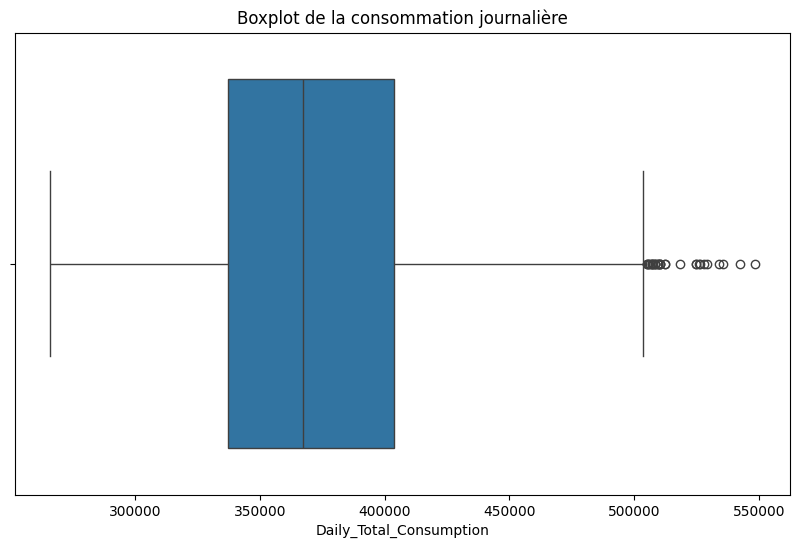

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=pd_daily_sum["Daily_Total_Consumption"])
plt.title("Boxplot de la consommation journalière")
plt.show()

In [ ]:
from scipy.stats import zscore


pd_daily_sum["z_score"] = zscore(pd_daily_sum["Daily_Total_Consumption"])
outliers = pd_daily_sum[pd_daily_sum["z_score"].abs() > 3]
print("Valeurs aberrantes détectées : ", len(outliers))


Valeurs aberrantes détectées :  11


In [ ]:
outliers

,Date,Daily_Total_Consumption,z_score
765,2007-02-05,526420.0,3.241733
766,2007-02-06,542682.0,3.583775
1476,2009-01-16,548349.0,3.702971
2173,2010-12-14,518482.0,3.074771
3293,2014-01-07,535660.0,3.436080
3310,2014-01-24,528058.0,3.276185
3314,2014-01-28,525861.0,3.229975
3315,2014-01-29,524931.0,3.210414
3659,2015-01-08,524960.0,3.211024
3701,2015-02-19,533988.0,3.400912


In [ ]:
import numpy as np

np_outliers= outliers["Daily_Total_Consumption"].to_numpy()
np_outliers

array([526420., 542682., 548349., 518482., 535660., 528058., 525861.,
       524931., 524960., 533988., 529129.])

#Prétraitement des données (Features Engineering, Encodage, Standardisation, etc)
- **Objectif :** Préparation de nos données en format plus propice pour que notre modèle réussi à bien prévoire la consommation future
  

#Vérification de la linéarité des données

/usr/local/lib/python3.10/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=13
  res = hypotest_fun_out(*samples, **kwds)


                              OLS Regression Results                              
Dep. Variable:     avg_annual_consumption   R-squared:                       0.653
Model:                                OLS   Adj. R-squared:                  0.621
Method:                     Least Squares   F-statistic:                     20.70
Date:                    Wed, 01 Jan 2025   Prob (F-statistic):           0.000831
Time:                            16:57:54   Log-Likelihood:                -181.05
No. Observations:                      13   AIC:                             366.1
Df Residuals:                          11   BIC:                             367.2
Df Model:                               1                                         
Covariance Type:                nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       

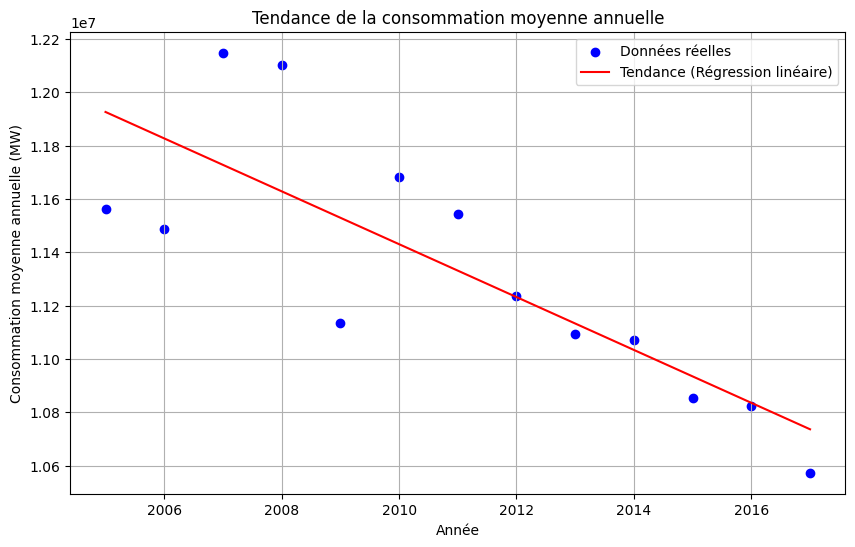

In [ ]:
import statsmodels.api as sm

df_annual = df_monthly_consumption.groupBy("Year") \
    .agg(avg("total_consumption").alias("avg_annual_consumption")) \
    .orderBy("Year").toPandas()

X = df_annual['Year']
y = df_annual['avg_annual_consumption']
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
print(model.summary())

# Tracé
plt.figure(figsize=(10, 6))
plt.scatter(df_annual['Year'], df_annual['avg_annual_consumption'], color='blue', label='Données réelles')
plt.plot(df_annual['Year'], model.predict(X), color='red', label='Tendance (Régression linéaire)')
plt.title('Tendance de la consommation moyenne annuelle')
plt.xlabel('Année')
plt.ylabel('Consommation moyenne annuelle (MW)')
plt.legend()
plt.grid(True)
plt.show()


###importation des données journalières

In [ ]:
#df1 = pd.read_excel("/content/drive/MyDrive/Datasets/result_data/daily_data.xlsx")
df1 = df_daily_sum.orderBy(col("Date").asc())
df1.show()

+----------+-----------------------+
|      Date|Daily_Total_Consumption|
+----------+-----------------------+
|2005-01-01|               311897.0|
|2005-01-02|               322712.0|
|2005-01-03|               363937.0|
|2005-01-04|               374003.0|
|2005-01-05|               389445.0|
|2005-01-06|               374851.0|
|2005-01-07|               389679.0|
|2005-01-08|               363338.0|
|2005-01-09|               349828.0|
|2005-01-10|               390332.0|
|2005-01-11|               394250.0|
|2005-01-12|               368065.0|
|2005-01-13|               360620.0|
|2005-01-14|               400007.0|
|2005-01-15|               397533.0|
|2005-01-16|               400928.0|
|2005-01-17|               480699.0|
|2005-01-18|               499350.0|
|2005-01-19|               477819.0|
|2005-01-20|               448482.0|
+----------+-----------------------+
only showing top 20 rows



###Remplacement des valeurs aberrentes (outliers) avec la moyenne

In [ ]:
from pyspark.sql import functions as F
# Calculer la moyenne de la colonne Daily_Total_Consumption
mean_value = df1.select(F.mean("Daily_Total_Consumption")).collect()[0][0]
# Remplacer les valeurs aberrantes spécifiques par la moyenne
# définition des 11 outliers trouvé pendant l'EDA
detected_outliers = np_outliers.tolist()

# Remplacer ces valeurs par la moyenne
df1 = df1.withColumn("Daily_Total_Consumption",
                   F.when(F.col("Daily_Total_Consumption").isin(detected_outliers), mean_value)
                    .otherwise(F.col("Daily_Total_Consumption"))
                  )

#Vérifier le résultat
df1.show()

+----------+-----------------------+
|      Date|Daily_Total_Consumption|
+----------+-----------------------+
|2005-01-01|               311897.0|
|2005-01-02|               322712.0|
|2005-01-03|               363937.0|
|2005-01-04|               374003.0|
|2005-01-05|               389445.0|
|2005-01-06|               374851.0|
|2005-01-07|               389679.0|
|2005-01-08|               363338.0|
|2005-01-09|               349828.0|
|2005-01-10|               390332.0|
|2005-01-11|               394250.0|
|2005-01-12|               368065.0|
|2005-01-13|               360620.0|
|2005-01-14|               400007.0|
|2005-01-15|               397533.0|
|2005-01-16|               400928.0|
|2005-01-17|               480699.0|
|2005-01-18|               499350.0|
|2005-01-19|               477819.0|
|2005-01-20|               448482.0|
+----------+-----------------------+
only showing top 20 rows



In [ ]:
#Vérification que les outliers correctement remplacés
from scipy.stats import zscore

df1_pd = df1.toPandas()

df1_pd["z_score"] = zscore(df1_pd["Daily_Total_Consumption"])
outliers = df1_pd[df1_pd["z_score"].abs() > 3]
print("Valeurs aberrantes détectées : ", len(outliers))

Valeurs aberrantes détectées :  0


In [ ]:
df1_pd

,Date,Daily_Total_Consumption,z_score
0,2005-01-01,311897.0,-1.279316
1,2005-01-02,322712.0,-1.048840
2,2005-01-03,363937.0,-0.170306
3,2005-01-04,374003.0,0.044208
4,2005-01-05,389445.0,0.373288
...,...,...,...
4743,2017-12-27,439663.0,1.443470
4744,2017-12-28,465511.0,1.994309
4745,2017-12-29,434221.0,1.327497
4746,2017-12-30,414764.0,0.912854


#Entrainement du premier modèle LSTM sur seulement la variable cible (Daily_Total_Consumption)

In [ ]:
df2= df1.select("Daily_Total_Consumption").toPandas()
df2.reset_index(drop=True, inplace=True)

In [ ]:
df2

,Daily_Total_Consumption
0,311897.0
1,322712.0
2,363937.0
3,374003.0
4,389445.0
...,...
4743,439663.0
4744,465511.0
4745,434221.0
4746,414764.0


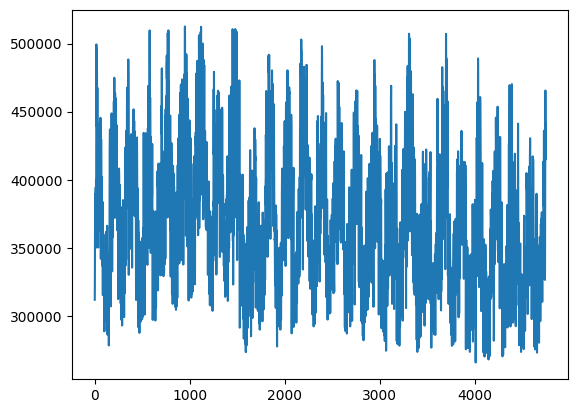

In [ ]:
plt.plot(df2)

# Normalisation de la cible

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
df2_scaled = scaler.fit_transform(np.array(df2).reshape(-1, 1))
df2_scaled

array([[0.18659185],
       [0.23043834],
       [0.39757395],
       ...,
       [0.68252141],
       [0.60363827],
       [0.71066181]])

#Division des données en TrainSet et TestSet

In [ ]:
training_size = int(len(df2_scaled) * 0.65)
test_size = len(df2_scaled) - training_size
train_data, test_data = df2_scaled[0:training_size, :], df2_scaled[training_size:len(df2_scaled), :1]

#Création du dataset Pytorch

In [ ]:
from torch.utils.data import Dataset, DataLoader
import torch
class EnergyDataset(Dataset):
    def __init__(self, data, seq_len=100):
        self.data = data
        self.data = torch.from_numpy(data).float().view(-1)
        self.seq_len = seq_len

    def __len__(self):
        return len(self.data)-self.seq_len-1

    def __getitem__(self, index):
        return self.data[index:index+self.seq_len], self.data[index+self.seq_len]


train_dataset = EnergyDataset(train_data)
test_dataset = EnergyDataset(test_data)

#Définition du bacth size & DataLoaders

In [ ]:
batch_size=64
train_dataloader = DataLoader(train_dataset, batch_size,drop_last=True)
test_dataloader = DataLoader(test_dataset, batch_size,drop_last=True)

#Utilisation du GPU pour un temps de traitement efficace et optimale
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

#Création du modèle

In [ ]:
import torch.nn as nn
class LSTMModel(nn.Module):
    def __init__(self, input_dim, hidden_size, num_layers, output_size):
        super(LSTMModel, self).__init__()
        self.num_layers = num_layers
        self.hidden_size = hidden_size
        self.input_size = input_dim
        self.lstm = nn.LSTM(input_size=input_dim, hidden_size=hidden_size, num_layers=num_layers)
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x, hn, cn):
        out,(hn,cn) = self.lstm(x,(hn,cn))
        final_out = self.fc(out[-1])
        return final_out,hn,cn

    def predict(self, x):
        hn,cn = self.init()
        final_out = self.fc(out[-1])
        return final_out

    def init(self):
      h0 = torch.zeros(self.num_layers, batch_size, self.hidden_size)
      c0 = torch.zeros(self.num_layers, batch_size, self.hidden_size)
      return h0, c0

input_dim = 1
hidden_size = 50
num_layers = 3
output_size = 1

model = LSTMModel(input_dim, hidden_size, num_layers, output_size).to(device)

#Définition de la fonction perte

In [ ]:
import torch.optim as optim
from torch.optim.lr_scheduler import ReduceLROnPlateau

loss_fn = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

#Liste pour le sauvegarde des pertes
train_epoch_losses = []
test_epoch_losses = []

#Définition de la fontion d'entrainement

In [ ]:
def train(dataloader):
    hn, cn = model.init()
    model.train()
    epoch_loss = 0
    for batch, item in enumerate(dataloader):
        x, y = item
        x = x.to(device)
        y = y.to(device)
        out, hn, cn = model(x.reshape(100, batch_size, 1), hn, cn)
        loss = loss_fn(out.reshape(batch_size), y)
        hn = hn.detach()
        cn = cn.detach()
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        epoch_loss += loss.item()

    avg_loss = epoch_loss / len(dataloader)
    train_epoch_losses.append(avg_loss)
    print(f"Train Loss (avg): {avg_loss:>7f}")

#Définition de la fontion de test

In [ ]:
def test(dataloader):
    hn, cn = model.init()
    model.eval()
    epoch_loss = 0
    with torch.no_grad():  # Pas de calcul de gradients pendant le test
        for batch, item in enumerate(dataloader):
            x, y = item
            x = x.to(device)
            y = y.to(device)
            out, hn, cn = model(x.reshape(100, batch_size, 1), hn, cn)
            loss = loss_fn(out.reshape(batch_size), y)
            epoch_loss += loss.item()

    avg_loss = epoch_loss / len(dataloader)
    test_epoch_losses.append(avg_loss)
    print(f"Test Loss (avg): {avg_loss:>7f}")

#Execution du modèle LSTM sur 35 époques

In [ ]:
epochs = 35
for epoch in range(epochs):
  print(f"Epoch: {epoch}")
  train(train_dataloader)
  test(test_dataloader)

Epoch: 0
Train Loss (avg): 0.087740
Test Loss (avg): 0.038533
Epoch: 1
Train Loss (avg): 0.035790
Test Loss (avg): 0.036818
Epoch: 2
Train Loss (avg): 0.036469
Test Loss (avg): 0.036702
Epoch: 3
Train Loss (avg): 0.036220
Test Loss (avg): 0.036559
Epoch: 4
Train Loss (avg): 0.036064
Test Loss (avg): 0.036270
Epoch: 5
Train Loss (avg): 0.035910
Test Loss (avg): 0.035956
Epoch: 6
Train Loss (avg): 0.035751
Test Loss (avg): 0.035643
Epoch: 7
Train Loss (avg): 0.035576
Test Loss (avg): 0.035342
Epoch: 8
Train Loss (avg): 0.035372
Test Loss (avg): 0.035050
Epoch: 9
Train Loss (avg): 0.035121
Test Loss (avg): 0.034763
Epoch: 10
Train Loss (avg): 0.034800
Test Loss (avg): 0.034476
Epoch: 11
Train Loss (avg): 0.034377
Test Loss (avg): 0.034195
Epoch: 12
Train Loss (avg): 0.033815
Test Loss (avg): 0.033936
Epoch: 13
Train Loss (avg): 0.033068
Test Loss (avg): 0.033717
Epoch: 14
Train Loss (avg): 0.032138
Test Loss (avg): 0.033259
Epoch: 15
Train Loss (avg): 0.031092
Test Loss (avg): 0.031681
Ep

#Calcul de la métrique de validation RMSE

In [ ]:
import math
from sklearn.metrics import mean_squared_error
def calculate_metrics(dataloader):
  predictions = []
  y_array = []
  with torch.no_grad():
    hn, cn = model.init()
    for batch, item in enumerate(dataloader):
      x, y = item
      x = x.to(device)
      y = y.to(device)
      x = x.view(100, batch_size, 1)
      pred = model(x, hn, cn)[0]
      pred = scaler.inverse_transform(pred.detach().cpu().numpy()).reshape(-1)
      y = scaler.inverse_transform(y.detach().cpu().numpy().reshape(1,-1)).reshape(-1)
      predictions = predictions + pred.tolist()
      y_array = y_array + y.tolist()
    return math.sqrt(mean_squared_error(y_array, predictions)) , y_array, torch.tensor(predictions)




In [ ]:

print(f"train rmse loss {calculate_metrics(train_dataloader)}")
print(f"test rmse loss {calculate_metrics(test_dataloader)}")


train rmse loss (20186.57097633957, [329595.0, 335568.0, 346691.03125, 347106.0, 338782.0, 309685.0, 296710.0, 338772.03125, 347358.0, 345837.03125, 336195.0, 339327.0, 336324.0, 352867.0, 360068.0, 351312.0, 348692.0, 351963.0, 345491.0, 314001.0, 300874.03125, 354829.03125, 361948.0, 356279.0, 348558.0, 338772.03125, 305282.0, 288499.0, 344112.0, 354265.0, 366216.0, 347610.0, 344416.0, 311363.0, 286320.0, 332366.0, 342444.0, 342162.0, 344802.0, 333687.0, 302452.0, 287690.0, 335285.0, 336577.0, 336957.0, 344745.0, 333854.0, 290557.0, 278378.0, 286890.0, 343505.0, 346510.0, 344445.03125, 346486.0, 340616.0, 356258.0, 415076.0, 420704.0, 428397.0, 434067.0, 436952.0, 384188.0, 364683.0, 421104.0, 428099.0, 388172.0, 361964.0, 349232.0, 314140.0, 307076.0, 365023.0, 383697.0, 401150.0, 402661.0, 420651.03125, 403889.0, 394028.0, 448727.0, 430341.0, 434576.03125, 427328.0, 404738.0, 339327.0, 332765.0, 362180.0, 389212.0, 388065.0, 374750.0, 375850.0, 357909.0, 358837.0, 415891.0, 444915.

In [ ]:
mean_squared_error, y_test, test_outputs = calculate_metrics(test_dataloader)

#Evaluation du modèle

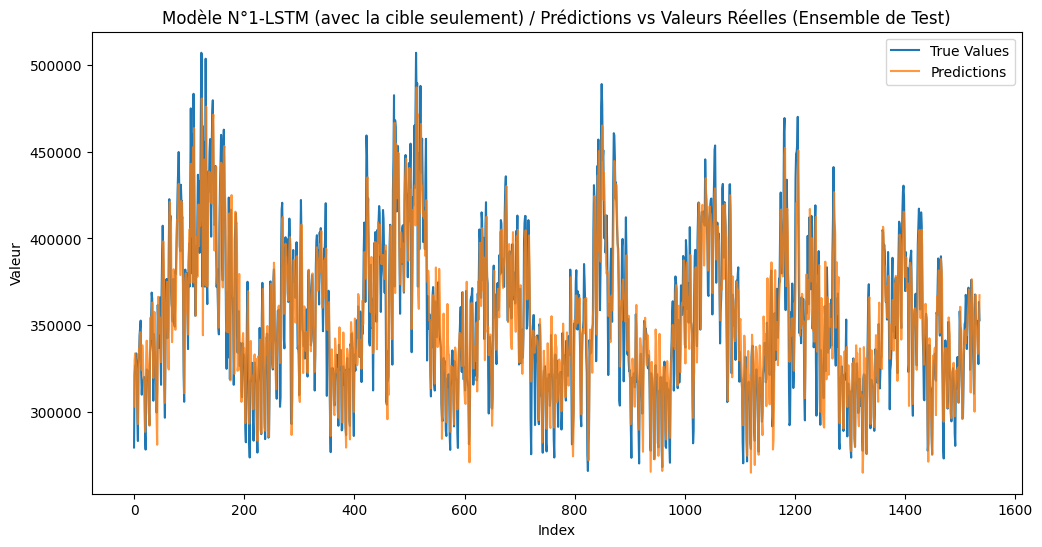

In [ ]:
plt.figure(figsize=(12, 6))
plt.title("Modèle N°1-LSTM (avec la cible seulement) / Prédictions vs Valeurs Réelles (Ensemble de Test)")
plt.xlabel("Index")
plt.ylabel("Valeur")
plt.plot(y_test, label='True Values', )
plt.plot(test_outputs.numpy(), label='Predictions',alpha=0.8)
plt.legend()
plt.show()

#Evolution de la perte

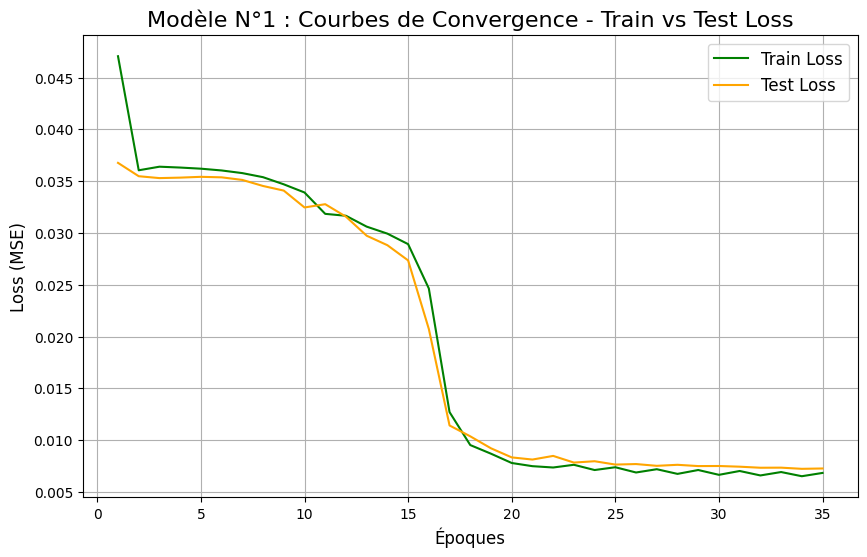

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(range(1, len(train_epoch_losses) + 1), train_epoch_losses, label="Train Loss", color="green",)
plt.plot(range(1, len(test_epoch_losses) + 1), test_epoch_losses, label="Test Loss", color="orange")
plt.title("Modèle N°1 : Courbes de Convergence - Train vs Test Loss", fontsize=16)
plt.xlabel("Époques", fontsize=12)
plt.ylabel("Loss (MSE)", fontsize=12)
plt.grid(True)
plt.legend(fontsize=12)
plt.show()


#Modèle N°2 : LSTM avec plus de features (Multivariate Time Series)

#Features Enginnering

### Features (1-7) -- Ajout de décalage temporelles (lags 1-7)

In [ ]:
from pyspark.sql.window import Window
from pyspark.sql.functions import lag

# Définir une fenêtre ordonnée par date
window_spec = Window.orderBy("date")

# Ajouter des lags (1 jour, 7 jours)
df1 = df1.withColumn("(consommation-1)", lag("Daily_Total_Consumption", 1).over(window_spec)) \
          .withColumn("(consommation-2)", lag("Daily_Total_Consumption", 2).over(window_spec)) \
          .withColumn("(consommation-3)", lag("Daily_Total_Consumption", 3).over(window_spec)) \
          .withColumn("(consommation-4)", lag("Daily_Total_Consumption", 4).over(window_spec)) \
          .withColumn("(consommation-5)", lag("Daily_Total_Consumption", 5).over(window_spec)) \
          .withColumn("(consommation-6)", lag("Daily_Total_Consumption", 6).over(window_spec)) \
          .withColumn("(consommation-7)", lag("Daily_Total_Consumption", 7).over(window_spec))

# Vérifier les données
df1.show()


+----------+-----------------------+----------------+----------------+----------------+----------------+----------------+----------------+----------------+
|      Date|Daily_Total_Consumption|(consommation-1)|(consommation-2)|(consommation-3)|(consommation-4)|(consommation-5)|(consommation-6)|(consommation-7)|
+----------+-----------------------+----------------+----------------+----------------+----------------+----------------+----------------+----------------+
|2005-01-01|               311897.0|            NULL|            NULL|            NULL|            NULL|            NULL|            NULL|            NULL|
|2005-01-02|               322712.0|        311897.0|            NULL|            NULL|            NULL|            NULL|            NULL|            NULL|
|2005-01-03|               363937.0|        322712.0|        311897.0|            NULL|            NULL|            NULL|            NULL|            NULL|
|2005-01-04|               374003.0|        363937.0|        322

###Feature 8 -- moyennes mobiles (fenêtres glissantes)
Cette variable a pour objectif de connaitre la moyenne de consommation des 7 derniers jours (max), cela pourra donner une information pertinente pour notre modèle

In [ ]:
from pyspark.sql.functions import mean

# Fenêtre de 7 jours glissants (les 6 jours précédents + le jour actuel)
window_spec_7 = Window.orderBy("date").rowsBetween(-6, 0)

# Ajouter la moyenne mobile
df1 = df1.withColumn("moving_avg_7", mean("Daily_Total_Consumption").over(window_spec_7))

# Vérifier les données
df1.show()


+----------+-----------------------+----------------+----------------+----------------+----------------+----------------+----------------+----------------+------------------+
|      Date|Daily_Total_Consumption|(consommation-1)|(consommation-2)|(consommation-3)|(consommation-4)|(consommation-5)|(consommation-6)|(consommation-7)|      moving_avg_7|
+----------+-----------------------+----------------+----------------+----------------+----------------+----------------+----------------+----------------+------------------+
|2005-01-01|               311897.0|            NULL|            NULL|            NULL|            NULL|            NULL|            NULL|            NULL|          311897.0|
|2005-01-02|               322712.0|        311897.0|            NULL|            NULL|            NULL|            NULL|            NULL|            NULL|          317304.5|
|2005-01-03|               363937.0|        322712.0|        311897.0|            NULL|            NULL|            NULL|    

###Extraction des variables (Feature 9 -- Jour) (Feature 10 mois) (Feature 11 -- saison)

In [ ]:
from pyspark.sql.functions import dayofweek, month, when

# Extraire jour de la semaine et mois
df1 = df1.withColumn("day_of_week", dayofweek("date")) \
       .withColumn("month", month("date"))

# Ajouter une colonne pour la saison
#df1 = df1.withColumn("season", when((month("date") >= 3) & (month("date") <= 5), "printemps")
#                           .when((month("date") >= 6) & (month("date") <= 8), "été")
 #                          .when((month("date") >= 9) & (month("date") <= 11), "automne")
  #                         .otherwise("hiver"))

# Vérifier les nouvelles colonnes
df1.show()


+----------+-----------------------+----------------+----------------+----------------+----------------+----------------+----------------+----------------+------------------+-----------+-----+
|      Date|Daily_Total_Consumption|(consommation-1)|(consommation-2)|(consommation-3)|(consommation-4)|(consommation-5)|(consommation-6)|(consommation-7)|      moving_avg_7|day_of_week|month|
+----------+-----------------------+----------------+----------------+----------------+----------------+----------------+----------------+----------------+------------------+-----------+-----+
|2005-01-01|               311897.0|            NULL|            NULL|            NULL|            NULL|            NULL|            NULL|            NULL|          311897.0|          7|    1|
|2005-01-02|               322712.0|        311897.0|            NULL|            NULL|            NULL|            NULL|            NULL|            NULL|          317304.5|          1|    1|
|2005-01-03|               363937.0

###Elimination des NAN résultantes de l'extraction de features

In [ ]:
# Filtrer les valeurs nulles introduites par les lags
df1 = df1.dropna()

# Vérifier les données finales
df1.show()


+----------+-----------------------+----------------+----------------+----------------+----------------+----------------+----------------+----------------+------------------+-----------+-----+
|      Date|Daily_Total_Consumption|(consommation-1)|(consommation-2)|(consommation-3)|(consommation-4)|(consommation-5)|(consommation-6)|(consommation-7)|      moving_avg_7|day_of_week|month|
+----------+-----------------------+----------------+----------------+----------------+----------------+----------------+----------------+----------------+------------------+-----------+-----+
|2005-01-08|               363338.0|        389679.0|        374851.0|        389445.0|        374003.0|        363937.0|        322712.0|        311897.0|368280.71428571426|          7|    1|
|2005-01-09|               349828.0|        363338.0|        389679.0|        374851.0|        389445.0|        374003.0|        363937.0|        322712.0| 372154.4285714286|          1|    1|
|2005-01-10|               390332.0

In [ ]:
df3 = df1.drop('Date').toPandas()
df3.reset_index(drop=True, inplace=True)
features = df3.drop(columns=['Daily_Total_Consumption'])
target = df3['Daily_Total_Consumption']
df3

,Daily_Total_Consumption,(consommation-1),(consommation-2),(consommation-3),(consommation-4),(consommation-5),(consommation-6),(consommation-7),moving_avg_7,day_of_week,month
0,363338.0,389679.0,374851.0,389445.0,374003.0,363937.0,322712.0,311897.0,368280.714286,7,1
1,349828.0,363338.0,389679.0,374851.0,389445.0,374003.0,363937.0,322712.0,372154.428571,1,1
2,390332.0,349828.0,363338.0,389679.0,374851.0,389445.0,374003.0,363937.0,375925.142857,2,1
3,394250.0,390332.0,349828.0,363338.0,389679.0,374851.0,389445.0,374003.0,378817.571429,3,1
4,368065.0,394250.0,390332.0,349828.0,363338.0,389679.0,374851.0,389445.0,375763.285714,4,1
...,...,...,...,...,...,...,...,...,...,...,...
4736,439663.0,400713.0,362107.0,330255.0,326509.0,350410.0,380985.0,362297.0,370091.714286,4,12
4737,465511.0,439663.0,400713.0,362107.0,330255.0,326509.0,350410.0,380985.0,382166.857143,5,12
4738,434221.0,465511.0,439663.0,400713.0,362107.0,330255.0,326509.0,350410.0,394139.857143,6,12
4739,414764.0,434221.0,465511.0,439663.0,400713.0,362107.0,330255.0,326509.0,406747.714286,7,12


In [ ]:
target

,Daily_Total_Consumption
0,363338.0
1,349828.0
2,390332.0
3,394250.0
4,368065.0
...,...
4736,439663.0
4737,465511.0
4738,434221.0
4739,414764.0


#Normalisation pour le modèle N°2 de LSTM

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
features_scaled = scaler.fit_transform(features)
target_scaled = scaler.fit_transform(target.values.reshape(-1, 1))

In [ ]:
features_scaled

array([[0.50193792, 0.44182181, 0.50098923, ..., 0.36951808, 1.        ,
        0.        ],
       [0.39514547, 0.50193792, 0.44182181, ..., 0.39019987, 0.        ,
        0.        ],
       [0.34037283, 0.39514547, 0.50193792, ..., 0.41033174, 0.16666667,
        0.        ],
       ...,
       [0.80937824, 0.70458452, 0.54667229, ..., 0.50758025, 0.83333333,
        1.        ],
       [0.68252141, 0.80937824, 0.70458452, ..., 0.5748937 , 1.        ,
        1.        ],
       [0.60363827, 0.68252141, 0.80937824, ..., 0.65948418, 0.        ,
        1.        ]])

# split

In [ ]:
training_size = int(len(features_scaled) * 0.65)
test_size = len(features_scaled) - training_size

X_train, y_train = features_scaled[0:training_size, :], target_scaled[0:training_size, :]
X_test, y_test = features_scaled[training_size:len(features_scaled), :], target_scaled[training_size:len(features_scaled), :]


In [ ]:
X_test.shape

(1660, 10)

In [ ]:
# Create sequences
def create_sequences(features, target, sequence_length):
    sequences = []
    labels = []
    for i in range(len(features) - sequence_length):
        seq = features[i:i + sequence_length]
        label = target[i + sequence_length]
        sequences.append(seq)
        labels.append(label)
    return np.array(sequences), np.array(labels)

In [ ]:
train_sequences, train_labels = create_sequences(X_train, y_train, sequence_length=100)
test_sequences, test_labels = create_sequences(X_test, y_test, sequence_length=100)

In [ ]:
test_labels.shape

(1560, 1)

In [ ]:
import torch
from torch.utils.data import Dataset

class EnergyTSDataset(Dataset):
    def __init__(self, sequences, labels):
        """
        Args:
            sequences (np.array): Input sequences (features).
            labels (np.array): Corresponding labels (targets).
        """
        self.sequences = torch.tensor(sequences, dtype=torch.float32)
        self.labels = torch.tensor(labels, dtype=torch.float32)

    def __len__(self):
        # Return the total number of samples
        return len(self.sequences)

    def __getitem__(self, idx):
        # Return the sequence and label at index `idx`
        return self.sequences[idx], self.labels[idx]

In [ ]:
# Create PyTorch datasets
train_dataset = EnergyTSDataset(train_sequences, train_labels)
test_dataset = EnergyTSDataset(test_sequences, test_labels)

In [ ]:
from torch.utils.data import DataLoader

# Define batch size
batch_size = 64

# Create data loaders
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)


In [ ]:
for sequences, labels in test_loader:
    print("Batch of sequences:", sequences.shape)
    print("Batch of labels:", labels.shape)
    # Use `sequences` and `labels` in your model


Batch of sequences: torch.Size([64, 100, 10])
Batch of labels: torch.Size([64, 1])
Batch of sequences: torch.Size([64, 100, 10])
Batch of labels: torch.Size([64, 1])
Batch of sequences: torch.Size([64, 100, 10])
Batch of labels: torch.Size([64, 1])
Batch of sequences: torch.Size([64, 100, 10])
Batch of labels: torch.Size([64, 1])
Batch of sequences: torch.Size([64, 100, 10])
Batch of labels: torch.Size([64, 1])
Batch of sequences: torch.Size([64, 100, 10])
Batch of labels: torch.Size([64, 1])
Batch of sequences: torch.Size([64, 100, 10])
Batch of labels: torch.Size([64, 1])
Batch of sequences: torch.Size([64, 100, 10])
Batch of labels: torch.Size([64, 1])
Batch of sequences: torch.Size([64, 100, 10])
Batch of labels: torch.Size([64, 1])
Batch of sequences: torch.Size([64, 100, 10])
Batch of labels: torch.Size([64, 1])
Batch of sequences: torch.Size([64, 100, 10])
Batch of labels: torch.Size([64, 1])
Batch of sequences: torch.Size([64, 100, 10])
Batch of labels: torch.Size([64, 1])
Batc

In [ ]:
import torch
import torch.nn as nn

class LSTMModel(nn.Module):
    def __init__(self, input_size, hidden_size, output_size, num_layers=1):
        super(LSTMModel, self).__init__()
        self.hidden_size = hidden_size
        self.num_layers = num_layers
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(x.device)  # Hidden state
        c0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(x.device)  # Cell state
        out, _ = self.lstm(x, (h0, c0))  # LSTM output
        out = self.fc(out[:, -1, :])  # Fully connected layer (using the last time step)
        return out

In [ ]:
import torch
import torch.nn as nn

# Fonction d'entraînement
def train_model(model, train_loader, criterion, optimizer, device):
    model.train()
    epoch_loss = 0
    for sequences, labels in train_loader:
        sequences, labels = sequences.to(device), labels.to(device)

        # Forward pass
        outputs = model(sequences)
        loss = criterion(outputs, labels)

        # Backward pass and optimisation
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        epoch_loss += loss.item()
    return epoch_loss / len(train_loader)

# Fonction de test
def test_model(model, test_loader, criterion, device):
    model.eval()
    test_loss = 0
    predictions = []
    actuals = []

    with torch.no_grad():
        for sequences, labels in test_loader:
            sequences, labels = sequences.to(device), labels.to(device)

            # Forward pass
            outputs = model(sequences)
            loss = criterion(outputs, labels)

            test_loss += loss.item()
            predictions.extend(outputs.cpu().numpy())  # Récupérer les prédictions
            actuals.extend(labels.cpu().numpy())      # Récupérer les valeurs réelles

    avg_loss = test_loss / len(test_loader)
    return avg_loss, predictions, actuals


In [ ]:
# Hyperparameters
input_size = 10  # Number of features
hidden_size = 50  # Number of hidden units in the LSTM
output_size = 1  # Single output value (e.g., regression)
num_layers = 3
# Hyperparamètres
num_epochs = 35
learning_rate = 0.001
# Move model to device (GPU if available)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Initialisation du modèle, de la fonction de perte et de l'optimiseur
model = LSTMModel(input_size, hidden_size, output_size, num_layers).to(device)
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

# Entraînement et test
train_losses = []
test_losses = []

for epoch in range(num_epochs):
    # Entraîner le modèle
    train_loss = train_model(model, train_loader, criterion, optimizer, device)
    train_losses.append(train_loss)

    # Tester le modèle
    test_loss, predictions, actuals = test_model(model, test_loader, criterion, device)
    test_losses.append(test_loss)

    print(f"Epoch [{epoch+1}/{num_epochs}] -> Train Loss: {train_loss:.4f}, Test Loss: {test_loss:.4f}")

# Afficher les performances finales
print(f"Final Test Loss: {test_loss:.4f}")


Epoch [1/35] -> Train Loss: 0.0944, Test Loss: 0.0352
Epoch [2/35] -> Train Loss: 0.0254, Test Loss: 0.0229
Epoch [3/35] -> Train Loss: 0.0212, Test Loss: 0.0223
Epoch [4/35] -> Train Loss: 0.0207, Test Loss: 0.0227
Epoch [5/35] -> Train Loss: 0.0200, Test Loss: 0.0215
Epoch [6/35] -> Train Loss: 0.0199, Test Loss: 0.0204
Epoch [7/35] -> Train Loss: 0.0191, Test Loss: 0.0195
Epoch [8/35] -> Train Loss: 0.0162, Test Loss: 0.0159
Epoch [9/35] -> Train Loss: 0.0148, Test Loss: 0.0157
Epoch [10/35] -> Train Loss: 0.0137, Test Loss: 0.0165
Epoch [11/35] -> Train Loss: 0.0129, Test Loss: 0.0136
Epoch [12/35] -> Train Loss: 0.0122, Test Loss: 0.0131
Epoch [13/35] -> Train Loss: 0.0117, Test Loss: 0.0137
Epoch [14/35] -> Train Loss: 0.0111, Test Loss: 0.0121
Epoch [15/35] -> Train Loss: 0.0109, Test Loss: 0.0119
Epoch [16/35] -> Train Loss: 0.0105, Test Loss: 0.0118
Epoch [17/35] -> Train Loss: 0.0108, Test Loss: 0.0126
Epoch [18/35] -> Train Loss: 0.0104, Test Loss: 0.0120
Epoch [19/35] -> Tr

In [ ]:
import math
from sklearn.metrics import mean_squared_error

def calculate_rmse(model, test_loader, scaler, device):
    model.eval()
    predictions = []
    actuals = []

    with torch.no_grad():
        for sequences, labels in test_loader:
            sequences, labels = sequences.to(device), labels.to(device)
            outputs = model(sequences)
            predictions.extend(outputs.cpu().numpy())
            actuals.extend(labels.cpu().numpy())

    # Dénormaliser les valeurs
    predictions = scaler.inverse_transform(predictions)
    actuals = scaler.inverse_transform(actuals)

    # Calculer le MSE
    mse = mean_squared_error(actuals, predictions)
    # Retourner la RMSE
    rmse = math.sqrt(mse)
    return rmse

# Utilisation de la fonction pour calculer la RMSE réelle
rmse = calculate_rmse(model, test_loader, scaler, device)
print(f"Test RMSE: {rmse:.4f}")


Test RMSE: 24478.7742


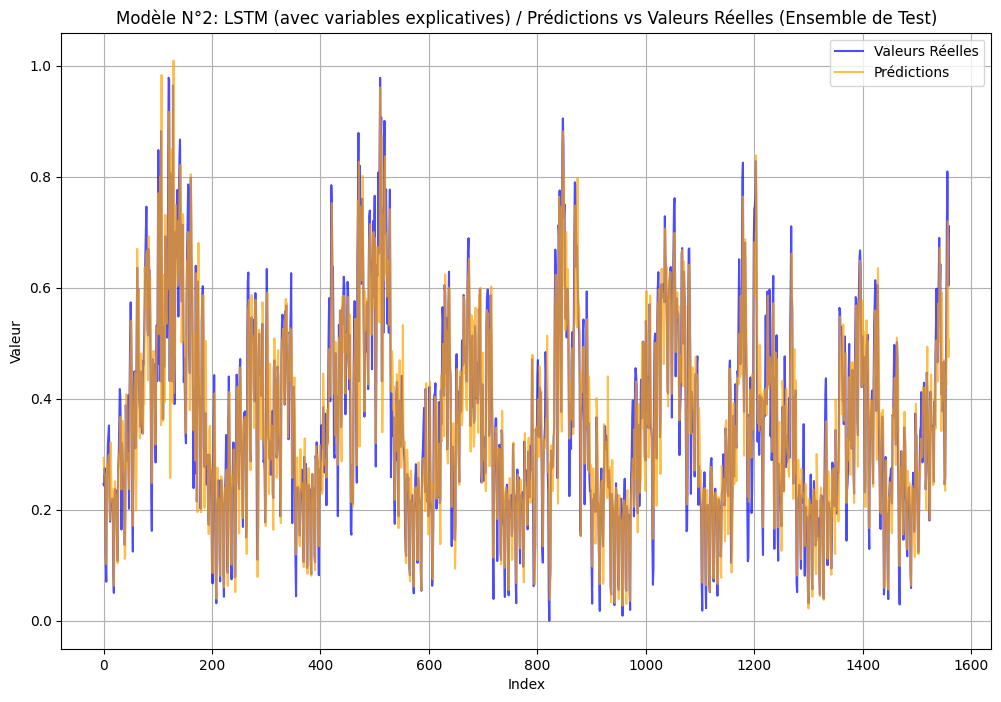

In [ ]:
import matplotlib.pyplot as plt

# Tracé complet des prédictions vs valeurs réelles
def plot_all_predictions(predictions, actuals):
    plt.figure(figsize=(12, 8))
    plt.plot(actuals, label="Valeurs Réelles", color="blue", alpha=0.7)
    plt.plot(predictions, label="Prédictions", color="orange", alpha=0.7)
    plt.xlabel("Index")
    plt.ylabel("Valeur")
    plt.title("Modèle N°2: LSTM (avec variables explicatives) / Prédictions vs Valeurs Réelles (Ensemble de Test)")
    plt.legend()
    plt.grid(True)
    plt.show()

# Appeler la fonction pour tracer toutes les données
plot_all_predictions(predictions, actuals)


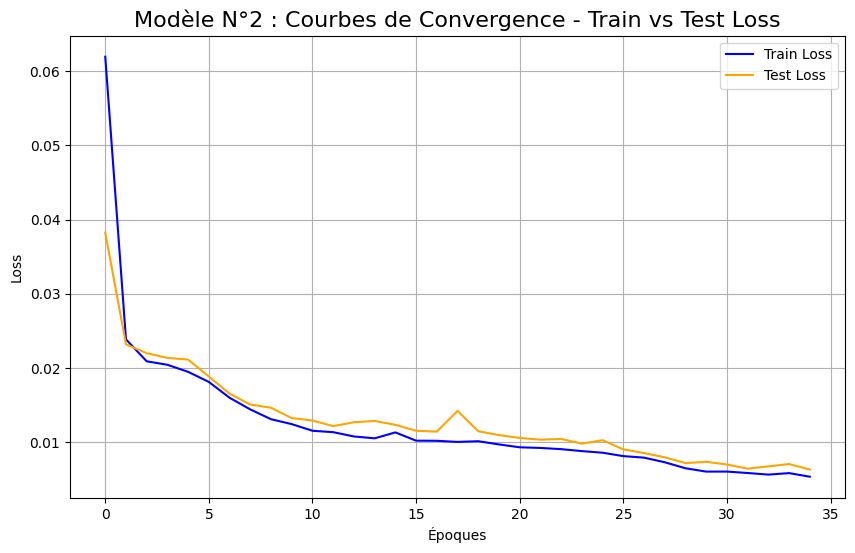

In [ ]:
import matplotlib.pyplot as plt

# Tracé des pertes
plt.figure(figsize=(10, 6))
plt.plot(train_losses, label="Train Loss", color="blue")
plt.plot(test_losses, label="Test Loss", color="orange")
plt.xlabel("Époques")
plt.ylabel("Loss")
plt.title("Modèle N°2 : Courbes de Convergence - Train vs Test Loss", fontsize=16)
plt.legend()
plt.grid(True)
plt.show()


#Modèle Avec SPARK (Regression)

In [ ]:
df4 = df1
df4.show()

+----------+-----------------------+----------------+----------------+----------------+----------------+----------------+----------------+----------------+------------------+-----------+-----+
|      Date|Daily_Total_Consumption|(consommation-1)|(consommation-2)|(consommation-3)|(consommation-4)|(consommation-5)|(consommation-6)|(consommation-7)|      moving_avg_7|day_of_week|month|
+----------+-----------------------+----------------+----------------+----------------+----------------+----------------+----------------+----------------+------------------+-----------+-----+
|2005-01-08|               363338.0|        389679.0|        374851.0|        389445.0|        374003.0|        363937.0|        322712.0|        311897.0|368280.71428571426|          7|    1|
|2005-01-09|               349828.0|        363338.0|        389679.0|        374851.0|        389445.0|        374003.0|        363937.0|        322712.0| 372154.4285714286|          1|    1|
|2005-01-10|               390332.0

In [ ]:
# Diviser les données
train_data, test_data = df4.randomSplit([0.75, 0.25], seed=42)

###Normalisation avec Spark

In [ ]:
from pyspark.ml.feature import VectorAssembler, MinMaxScaler
from pyspark.ml import Pipeline

features_columns=["(consommation-1)", "(consommation-2)", "(consommation-3)", "(consommation-4)", "(consommation-5)", "(consommation-6)", "(consommation-7)", "moving_avg_7", "day_of_week", "month"]
assembler = VectorAssembler(inputCols=features_columns, outputCol="features")
scaler = MinMaxScaler(inputCol="features", outputCol="scaled_features")

pipeline = Pipeline(stages=[assembler, scaler])

train_data = pipeline.fit(train_data).transform(train_data)
test_data = pipeline.fit(test_data).transform(test_data)



In [ ]:
test_data.select("scaled_features").show()


+--------------------+
|     scaled_features|
+--------------------+
|[0.33462177854574...|
|[0.37881108172072...|
|[0.52995635118867...|
|[0.54385763772305...|
|[0.73857392044942...|
|[0.63690003357600...|
|[0.48316695465600...|
|[0.42908910745141...|
|[0.33620230773640...|
|[0.47415056792590...|
|[0.64690732202668...|
|[0.71105797184528...|
|[0.67188869143647...|
|[0.46736575738467...|
|[0.48603319930227...|
|[0.50511829401118...|
|[0.60155514245235...|
|[0.40105314017574...|
|[0.68298515285273...|
|[0.62864934362997...|
+--------------------+
only showing top 20 rows



In [ ]:
from pyspark.ml.regression import LinearRegression
from pyspark.ml.evaluation import RegressionEvaluator

LinearRegression = LinearRegression(featuresCol="scaled_features", labelCol="Daily_Total_Consumption", regParam=0.1, solver="auto", predictionCol="prediction")

model = LinearRegression.fit(train_data)

predictions = model.transform(test_data)

In [ ]:
from pyspark.ml.evaluation import RegressionEvaluator

# Initialiser l'évaluateur
evaluator = RegressionEvaluator(labelCol="Daily_Total_Consumption", predictionCol="prediction", metricName="rmse")

# Calculer le RMSE
rmse = evaluator.evaluate(predictions)
print(f"Root Mean Squared Error (RMSE) : {rmse}")


Root Mean Squared Error (RMSE) : 4540.568048884585


In [ ]:
# Sélectionner les colonnes nécessaires
predicted_data = predictions.select("Daily_Total_Consumption", "prediction")

# Afficher les données
predicted_data.show()



+-----------------------+------------------+
|Daily_Total_Consumption|        prediction|
+-----------------------+------------------+
|               390332.0|392124.71393985965|
|               400007.0| 402676.6257850636|
|               400928.0|403958.59085718857|
|               480699.0| 483951.4547837649|
|               453776.0|449504.92030794924|
|               457276.0| 452237.1241100775|
|               427070.0| 423355.4143759712|
|               350214.0| 348170.9340542354|
|               384542.0| 383199.6771717523|
|               384398.0|387050.53646446986|
|               441762.0| 445621.0640133215|
|               373987.0| 375922.9905843225|
|               396286.0|398267.57571049454|
|               386806.0| 386589.1416487348|
|               391467.0| 392429.4395105609|
|               420623.0|422747.40924766916|
|               375256.0| 376752.9169894652|
|               410460.0|410654.52791518334|
|               423921.0| 423916.2822922967|
|         

In [ ]:
# Convertir le Spark DataFrame en Pandas DataFrame
predicted_data_pd = predicted_data.toPandas()


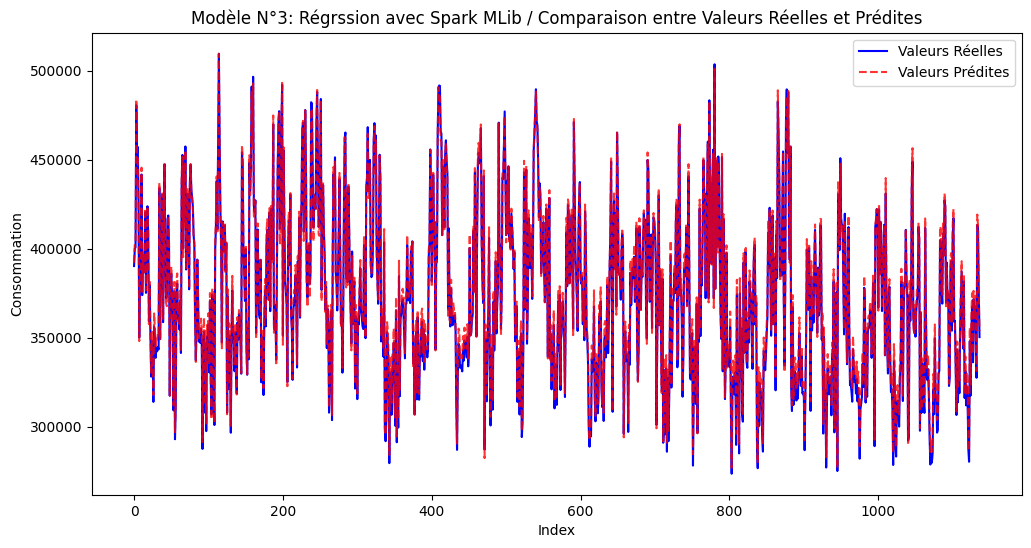

In [ ]:
import matplotlib.pyplot as plt

# Tracer les valeurs réelles et prédites
plt.figure(figsize=(12, 6))
plt.plot(predicted_data_pd["Daily_Total_Consumption"], label="Valeurs Réelles", color="blue")
plt.plot(predicted_data_pd["prediction"], label="Valeurs Prédites", color="red", linestyle="dashed", alpha=0.8)

# Ajouter des légendes et des titres
plt.title("Modèle N°3: Régrssion avec Spark MLib / Comparaison entre Valeurs Réelles et Prédites")
plt.xlabel("Index")
plt.ylabel("Consommation")
plt.legend()
plt.show()


#Visualisation de l'erreur résiduelle

In [ ]:
residuals = predictions.withColumn("residual", predictions["Daily_Total_Consumption"] - predictions["prediction"])


In [ ]:
residuals.describe("residual").show()

+-------+-------------------+
|summary|           residual|
+-------+-------------------+
|  count|               1137|
|   mean|-2839.3020576116496|
| stddev| 3544.8799805122026|
|    min|-10019.931673752551|
|    max|  8800.522477110731|
+-------+-------------------+



In [ ]:
residuals_pd = residuals.select("residual").toPandas()
residuals_pd.head()

,residual
0,-1792.713940
1,-2669.625785
2,-3030.590857
3,-3252.454784
4,4271.079692


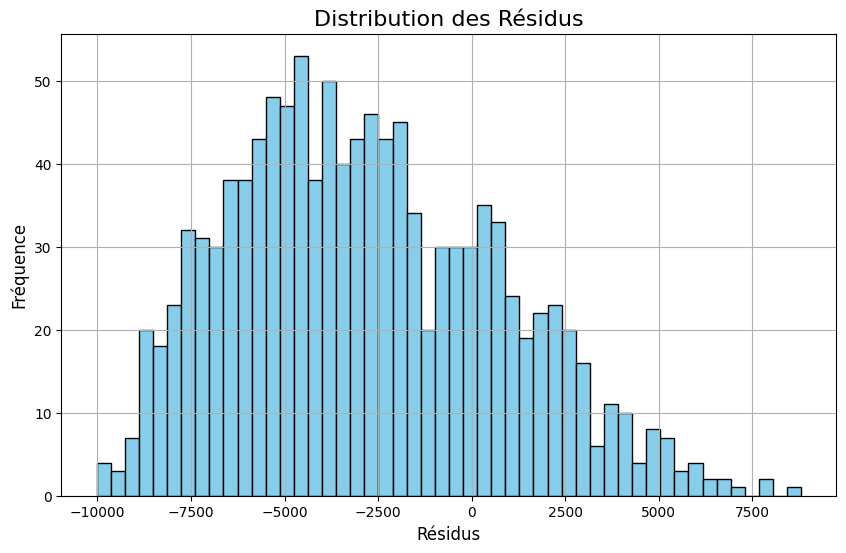

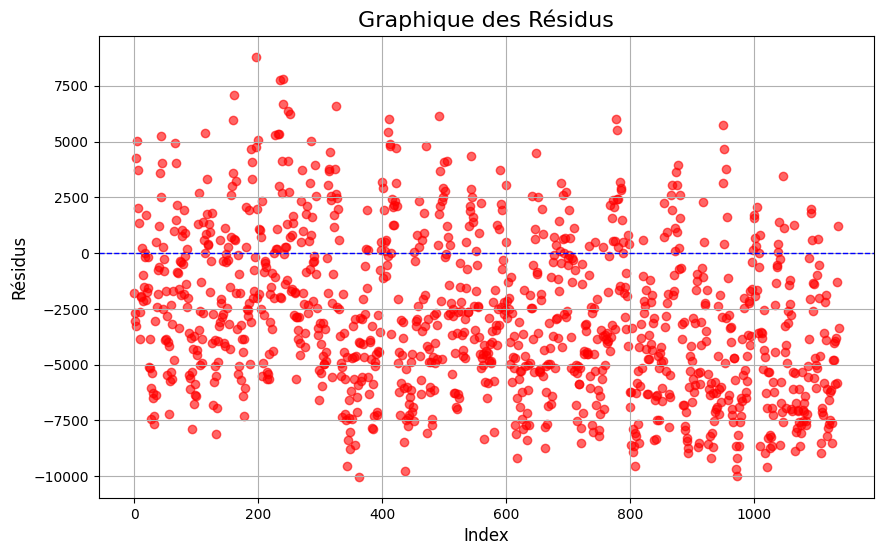

In [ ]:
import matplotlib.pyplot as plt

# Histogramme des résidus
plt.figure(figsize=(10, 6))
plt.hist(residuals_pd["residual"], bins=50, color="skyblue", edgecolor="black")
plt.title("Distribution des Résidus", fontsize=16)
plt.xlabel("Résidus", fontsize=12)
plt.ylabel("Fréquence", fontsize=12)
plt.grid(True)
plt.show()

# Graphique de dispersion des résidus
plt.figure(figsize=(10, 6))
plt.scatter(range(len(residuals_pd)), residuals_pd["residual"], alpha=0.6, color="red")
plt.axhline(y=0, color="blue", linestyle="--", linewidth=1)
plt.title("Graphique des Résidus", fontsize=16)
plt.xlabel("Index", fontsize=12)
plt.ylabel("Résidus", fontsize=12)
plt.grid(True)
plt.show()


#Optimisation

In [ ]:
from pyspark.ml.tuning import ParamGridBuilder, TrainValidationSplit

# Create the linear regression model
#lr = LinearRegression(featuresCol="scaled_features", labelCol="Daily_Total_Consumption", solver="auto")

# Set up the parameter grid for hyperparameter tuning
paramGrid = ParamGridBuilder().addGrid(LinearRegression.regParam, [0.1, 0.01, 0.001]).addGrid(LinearRegression.maxIter, [10, 50, 100]).build()

# Set up the TrainValidationSplit for cross-validation
tvs = TrainValidationSplit(estimator=LinearRegression, estimatorParamMaps=paramGrid, evaluator=RegressionEvaluator(labelCol="Daily_Total_Consumption", predictionCol="prediction", metricName="rmse"), trainRatio=0.8)

# Train the model
model1 = tvs.fit(train_data)

# Get the best model from the TrainValidationSplit
bestModel = model1.bestModel

# Make predictions on the test data
predictions = bestModel.transform(test_data)
# Show predictions
predictions.select("scaled_features", "Daily_Total_Consumption", "prediction").show()
# Evaluate the model
rmse = RegressionEvaluator(labelCol="Daily_Total_Consumption", predictionCol="prediction", metricName="rmse").evaluate(predictions)
print(f"Root Mean Squared Error (RMSE) on test data = {rmse}")



+--------------------+-----------------------+------------------+
|     scaled_features|Daily_Total_Consumption|        prediction|
+--------------------+-----------------------+------------------+
|[0.33462177854574...|               390332.0|392137.98196537694|
|[0.37881108172072...|               400007.0| 402693.7257918396|
|[0.52995635118867...|               400928.0| 403964.4141422007|
|[0.54385763772305...|               480699.0|483982.92301652086|
|[0.73857392044942...|               453776.0|449514.93614705815|
|[0.63690003357600...|               457276.0| 452247.5009704848|
|[0.48316695465600...|               427070.0|423357.99419407273|
|[0.42908910745141...|               350214.0|348159.27739397704|
|[0.33620230773640...|               384542.0| 383204.1455165586|
|[0.47415056792590...|               384398.0|387050.36138854665|
|[0.64690732202668...|               441762.0| 445629.7110552989|
|[0.71105797184528...|               373987.0|  375908.732308777|
|[0.671888

In [ ]:
from pyspark.sql import SparkSession
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.regression import LinearRegression

# Créez une session Spark
spark = SparkSession.builder.appName("TimeSeriesPrediction").getOrCreate()

# Charger les données
data = [
    (1, 100.0), (2, 101.5), (3, 102.3), (4, 103.8), (5, 105.2),
    (6, 106.5), (7, 108.1), (8, 109.3), (9, 110.7), (10, 112.0)
]
columns = ["Time", "Value"]

df = spark.createDataFrame(data, columns)

# Assembler les caractéristiques
assembler = VectorAssembler(inputCols=["Time"], outputCol="features")
df = assembler.transform(df)

# Diviser les données en ensemble d'entraînement et de test
train_data, test_data = df.randomSplit([0.8, 0.2], seed=1234)

# Créer un modèle de régression linéaire
lr = LinearRegression(featuresCol="features", labelCol="Value")

# Entraîner le modèle
lr_model = lr.fit(train_data)

# Faire des prédictions
predictions = lr_model.transform(test_data)

# Afficher les prédictions
predictions.select("Time", "Value", "prediction").show()

# Fermer la session Spark
spark.stop()
